In [4]:
# import the packages
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from keras.optimizers import Adam
from keras.utils import to_categorical

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# train_images = rgb2gray(train_images).reshape(50000,32,32,1)
# test_images = rgb2gray(test_images).reshape(10000,32,32,1)
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

train_images = tf.image.rgb_to_grayscale(train_images)
test_images = tf.image.rgb_to_grayscale(test_images)
val_images = tf.image.rgb_to_grayscale(val_images)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
val_labels  = to_categorical(val_labels)

print(train_images.shape)
print(val_images.shape)

print()
print(train_labels.shape)

2023-11-13 14:36:55.887253: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-13 14:36:56.121483: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-13 14:36:56.121601: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-13 14:36:56.137152: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-13 14:36:56.137215: I tensorflow/compile

(40000, 32, 32, 1)
(10000, 32, 32, 1)

(40000, 10)


## test


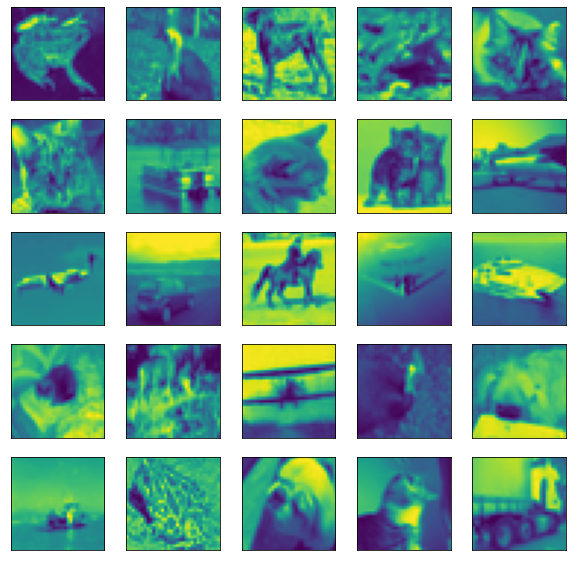

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    # plt.xlabel(class_names[train_labels[i][0]])
plt.show()

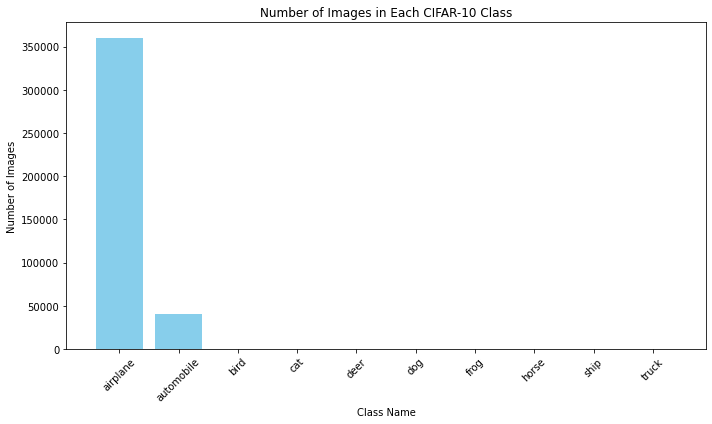

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a dictionary to count the number of images in each class
class_counts = {}
for i in range(10):
    class_counts[class_names[i]] = len(train_labels[train_labels == i])

# Extract class names and counts
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each CIFAR-10 Class')
plt.xticks(rotation=45)
plt.tight_layout()

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(val_images, val_labels), verbose=1)


Epoch 1/20


2023-11-13 13:55:57.450838: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


625/625 [==============================] - 6s 9ms/step - loss: 2.0468 - accuracy: 0.2410 - val_loss: 1.7351 - val_accuracy: 0.3677
Epoch 2/20
625/625 [==============================] - 5s 8ms/step - loss: 1.6223 - accuracy: 0.4103 - val_loss: 1.4052 - val_accuracy: 0.4990
Epoch 3/20
625/625 [==============================] - 5s 8ms/step - loss: 1.3750 - accuracy: 0.5108 - val_loss: 1.2490 - val_accuracy: 0.5648
Epoch 4/20
625/625 [==============================] - 5s 8ms/step - loss: 1.1855 - accuracy: 0.5856 - val_loss: 1.0313 - val_accuracy: 0.6422
Epoch 5/20
625/625 [==============================] - 5s 8ms/step - loss: 1.0514 - accuracy: 0.6358 - val_loss: 0.9240 - val_accuracy: 0.6830
Epoch 6/20
625/625 [==============================] - 5s 8ms/step - loss: 0.9613 - accuracy: 0.6643 - val_loss: 0.8650 - val_accuracy: 0.7005
Epoch 7/20
625/625 [==============================] - 5s 8ms/step - loss: 0.8924 - accuracy: 0.6934 - val_loss: 0.7823 - val_accuracy: 0.7281
Epoch 8/20
625/62

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 64)         

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 64)         

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))

Epoch 1/30


2023-11-12 15:01:01.023112: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-11-12 15:01:04.365907: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-12 15:01:04.755206: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-12 15:01:04.823773: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f951f43d050 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-12 15:01:04.823819: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-11-12 15:01:04.889981: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-12 15:

1250/1250 [==============================] - 18s 6ms/step - loss: 1.7703 - accuracy: 0.3343 - val_loss: 1.4051 - val_accuracy: 0.4850
Epoch 2/30
1250/1250 [==============================] - 7s 5ms/step - loss: 1.3935 - accuracy: 0.4994 - val_loss: 1.3619 - val_accuracy: 0.5129
Epoch 3/30
1250/1250 [==============================] - 7s 5ms/step - loss: 1.2335 - accuracy: 0.5631 - val_loss: 1.1601 - val_accuracy: 0.5864
Epoch 4/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1315 - accuracy: 0.6005 - val_loss: 1.1090 - val_accuracy: 0.6018
Epoch 5/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0542 - accuracy: 0.6314 - val_loss: 1.0454 - val_accuracy: 0.6270
Epoch 6/30
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9950 - accuracy: 0.6513 - val_loss: 0.9907 - val_accuracy: 0.6465
Epoch 7/30
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9389 - accuracy: 0.6715 - val_loss: 0.9745 - val_accuracy: 0.6552
Ep

313/313 - 2s - loss: 0.7189 - accuracy: 0.7774 - 2s/epoch - 6ms/step


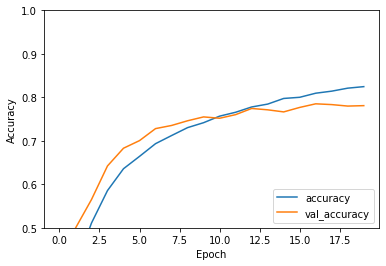

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [9]:
print(test_acc)

0.777400016784668


## hyper parameter tuning

In [7]:
def create_model(optimizer='adam', dropout_rate=0.25):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout_rate))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout_rate))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout_rate))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(layers.Dropout(dropout_rate))
  model.add(layers.Dense(10, activation='softmax'))
  # compile model
  # opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_data=(val_images, val_labels), verbose=1)
  return model

In [ ]:
model2 = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=1,dropout_rate=0.25)

# Define hyperparameters for random search
param_dist = {
    'optimizer': [Adam(lr=0.001), SGD(lr=0.001, momentum=0.9)],
    'dropout_rate': [0.3, 0.5,0.2]
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model2, param_distributions=param_dist, n_iter=2, cv=2)
random_result = random_search.fit(train_images, train_labels,validation_data=(val_images, val_labels))

# Print the best parameters and corresponding accuracy
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [8]:
model = create_model(SGD(lr=0.001, momentum=0.9),0.2)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/25


2023-11-13 12:26:49.522023: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


625/625 [==============================] - 9s 13ms/step - loss: 1.8812 - accuracy: 0.3019 - val_loss: 1.4816 - val_accuracy: 0.4613
Epoch 2/25
625/625 [==============================] - 5s 8ms/step - loss: 1.4175 - accuracy: 0.4832 - val_loss: 1.2348 - val_accuracy: 0.5432
Epoch 3/25
625/625 [==============================] - 5s 8ms/step - loss: 1.2156 - accuracy: 0.5621 - val_loss: 1.0235 - val_accuracy: 0.6353
Epoch 4/25
625/625 [==============================] - 5s 8ms/step - loss: 1.0795 - accuracy: 0.6174 - val_loss: 0.9959 - val_accuracy: 0.6469
Epoch 5/25
625/625 [==============================] - 5s 8ms/step - loss: 0.9700 - accuracy: 0.6558 - val_loss: 0.8332 - val_accuracy: 0.7085
Epoch 6/25
625/625 [==============================] - 5s 8ms/step - loss: 0.8882 - accuracy: 0.6881 - val_loss: 0.7968 - val_accuracy: 0.7201
Epoch 7/25
625/625 [==============================] - 5s 7ms/step - loss: 0.8383 - accuracy: 0.7057 - val_loss: 0.7676 - val_accuracy: 0.7319
Epoch 8/25
625/6

: 

In [6]:
print(test_acc)

0.7890999913215637


## using pretrained model


In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load CIFAR-10 data
(trainX, trainY), (testX, testY) = cifar10.load_data()

# Preprocess the data
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)

# Load pre-trained MobileNetV2 model without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Create a new model and add the pre-trained base model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model on CIFAR-10 data
model.fit(trainX, trainY, epochs=5, batch_size=64, validation_data=(testX, testY))

# Evaluate the model
loss, accuracy = model.evaluate(testX, testY)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

2023-11-13 14:05:10.165434: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-13 14:05:10.257725: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-13 14:05:11.571007: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2023-11-13 14:05:14.803079: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-13 14:05:14.843328: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-13 14:05:14.843369: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-13 14:05:14.845951: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-13 14:05:14.845992: I tensorflow/compile

Epoch 1/5


2023-11-13 14:05:28.402565: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-11-13 14:05:30.548940: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-13 14:05:31.861958: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-13 14:05:31.889885: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55c0d2e7a820 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-13 14:05:31.889936: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-11-13 14:05:32.002753: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-13 14:

782/782 [==============================] - 54s 36ms/step - loss: 1.2101 - accuracy: 0.5876 - val_loss: 2.6189 - val_accuracy: 0.3199
Epoch 2/5
782/782 [==============================] - 24s 31ms/step - loss: 0.8036 - accuracy: 0.7290 - val_loss: 1.6211 - val_accuracy: 0.5329
Epoch 3/5
782/782 [==============================] - 22s 28ms/step - loss: 0.6796 - accuracy: 0.7728 - val_loss: 1.0063 - val_accuracy: 0.7007
Epoch 4/5
782/782 [==============================] - 22s 28ms/step - loss: 0.6119 - accuracy: 0.7974 - val_loss: 1.1419 - val_accuracy: 0.6984
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 1.6046 - accuracy: 0.6585
Test Loss: 1.6045879125595093, Test Accuracy: 0.6585000157356262


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

# Load EfficientNetB0 with pre-trained weights, excluding the top (classification) layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding custom classification layers on top of the pre-trained model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# # Data augmentation using ImageDataGenerator
# datagen = ImageDataGenerator(
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip=True,
#     vertical_flip=False
# )

# datagen.fit(x_train)

# Train the model with fine-tuning
# model.fit(datagen.flow(x_train, y_train_one_hot, batch_size=32),
#           steps_per_epoch=len(x_train) / 32,
#           epochs=10,
#           validation_data=(x_test, y_test_one_hot))

model.fit(x_train, y_train_one_hot, epochs=5, batch_size=64, validation_data=(x_test, y_test_one_hot))



2023-11-13 14:21:09.096752: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-13 14:21:09.534038: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-13 14:21:11.092018: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-11-13 14:21:14.755987: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-13 14:21:14.984

Epoch 1/5


2023-11-13 14:21:27.038263: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-11-13 14:21:29.372628: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-13 14:21:29.730789: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-13 14:21:29.789037: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55b33bcbbce0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-13 14:21:29.789076: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-11-13 14:21:29.873728: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-13 14:

782/782 [==============================] - 22s 16ms/step - loss: 2.3063 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/5
782/782 [==============================] - 10s 12ms/step - loss: 2.3027 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/5
782/782 [==============================] - 11s 14ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/5
782/782 [==============================] - 10s 13ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
782/782 [==============================] - 10s 13ms/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000


### online model


In [ ]:

from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

## Bayesian

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from skopt import BayesSearchCV
from sklearn.base import BaseEstimator

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

# Define the model creation class
class KerasModel(BaseEstimator):
    def __init__(self, learning_rate, dropout_rate):
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.model = self.create_model()

    def create_model(self):
        model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dropout(self.dropout_rate),
            layers.Dense(10, activation='softmax')
        ])

        optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model.fit(X, y, epochs=5, verbose=1)  # You may adjust the number of epochs

    def score(self, X, y):
        _, accuracy = self.model.evaluate(X, y, verbose=1)
        return accuracy

# Define the hyperparameter search space
param_space = {
    'learning_rate': (1e-6, 1e-2, 'log-uniform'),
    'dropout_rate': (0.0, 0.5)
}

# Create an instance of the KerasModel class
keras_model = KerasModel(learning_rate=1e-3, dropout_rate=0.2)

# Define the Bayesian optimizer
bayes_cv_tuner = BayesSearchCV(
    keras_model,
    param_space,
    n_iter=10,
    n_jobs=-1,
    random_state=42,
    scoring='accuracy',
    cv=3
)

# Perform Bayesian optimization
bayes_cv_tuner.fit(x_train, y_train_one_hot)

# Print the best hyperparameters found
print("Best hyperparameters:", bayes_cv_tuner.best_params_)

# Get the best model
best_model = bayes_cv_tuner.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_model.score(x_test, y_test_one_hot)

print(f'Test Accuracy: {test_accuracy:.4f}')


2023-11-13 14:42:49.677742: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-13 14:42:50.191407: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-13 14:42:52.892107: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-11-13 14:42:59.624881: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-13 14:42:59.868

: 